In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
data =pd.read_csv('agricultural_yield.csv')
print(data.head())

Saving agricultural_yield.csv to agricultural_yield (1).csv
   Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     93.304721             0                        132.522218   96.670922   
1     83.674653             1                         57.283997   99.007556   
2     65.963033             1                        227.895479  104.844272   
3     78.692834             1                        176.314126   90.136191   
4     72.415684             1                        160.070418  101.221668   

   Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0   602.386237                    3            278.986563  
1   466.518251                    8            836.434840  
2   510.320495                    4            785.881787  
3   354.350914                    5            807.884526  
4   443.993788                   10           1064.542374  


In [11]:
  X = data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm','Irrigation_Schedule']].values
  Y = data['Yield_kg_per_hectare'].values
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [15]:
history = model.fit(X_train,Y_train, epochs=50,batch_size=32,validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 529719.8125 - mae: 700.3704 - val_loss: 555583.8125 - val_mae: 719.1146
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 521871.1875 - mae: 695.5133 - val_loss: 495423.4375 - val_mae: 678.6950
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 435438.7500 - mae: 634.3060 - val_loss: 347997.6875 - val_mae: 569.2103
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 283104.6250 - mae: 510.0741 - val_loss: 154021.0781 - val_mae: 378.8045
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 112965.0391 - mae: 318.4731 - val_loss: 36203.9961 - val_mae: 173.0353
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26622.2871 - mae: 141.7231 - val_loss: 11634.6211 - val_mae: 86.8468
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11155.1797 - mae: 85.7863 - val_loss: 9191.6230 - val_mae: 75.5718
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9245.6924 - mae: 76.6599 - val_loss: 8581

In [16]:
test_loss,test_mae = model.evaluate(X_test,Y_test,verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2852.5850 - mae: 43.0592 
Test Mean Absolute Error: 41.03


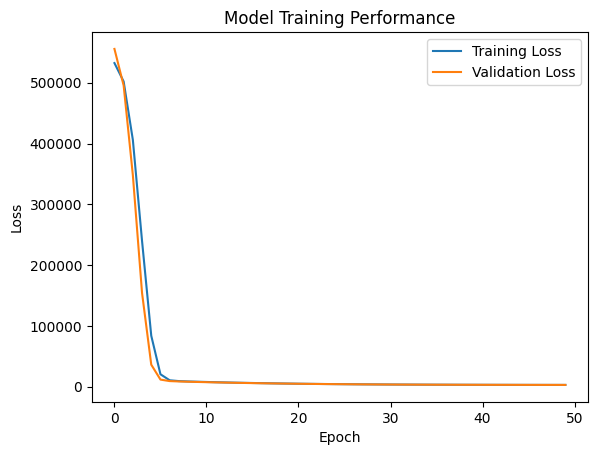

In [18]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

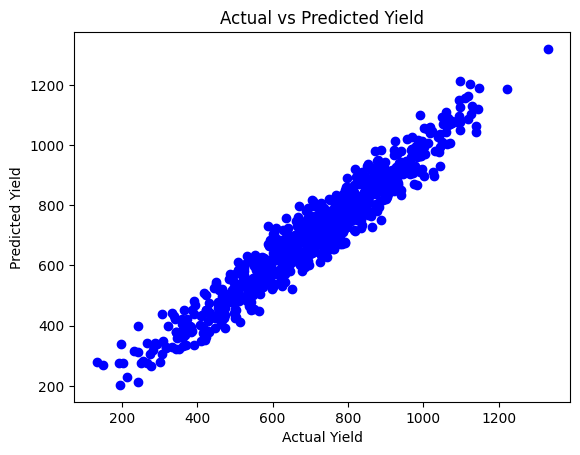

In [24]:
plt.scatter(Y_test,Y_pred,color='blue')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-23-f76ab6dddc17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test, label='Actual Yield')
<ipython-input-23-f76ab6dddc17>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_pred, label='Predicted Yield')  # Y_pred is now defined


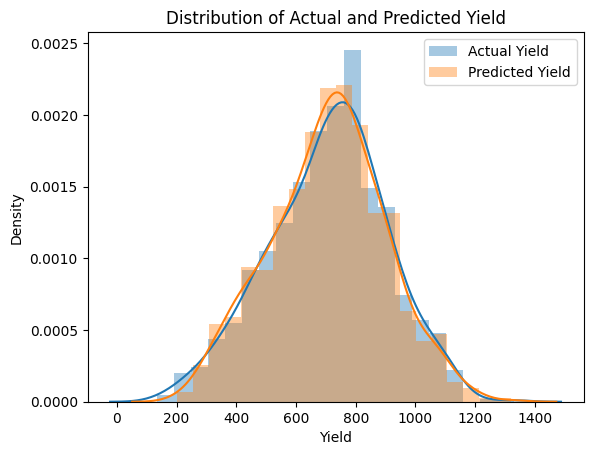

In [23]:
Y_pred = model.predict(X_test)

sns.distplot(Y_test, label='Actual Yield')
sns.distplot(Y_pred, label='Predicted Yield')  # Y_pred is now defined
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()